In [1]:
from smc import SMC
from prior import CatalogPrior
from images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

In [2]:
num_images = 1
img_dim = 20 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 10
psf_stdev = 3.25
background_intensity = 19200

image_attributes = ImageAttributes(img_width = img_width,
                                   img_height = img_height,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 10 
total flux
 633558.375 
loc
 [[ 0.          0.        ]
 [11.851297    6.0215783 ]
 [ 4.128373    0.84605014]
 [14.141203    9.242095  ]
 [ 9.922048   14.20344   ]
 [19.637428   15.056472  ]
 [ 4.618916    0.7214654 ]
 [ 7.708377   10.6054125 ]
 [ 9.71442    18.673084  ]
 [ 2.5807805   2.7556155 ]
 [ 0.66077244 16.273369  ]] 




True count: 10
True total flux: 633558.375

Starting the sampler...
iteration 5, temperature = 0.0007226963061839342, posterior mean count = 9.376596450805664
iteration 10, temperature = 0.0034771631471812725, posterior mean count = 9.831664085388184
iteration 15, temperature = 0.008689036592841148, posterior mean count = 9.774433135986328
iteration 20, temperature = 0.01566952094435692, posterior mean count = 9.637947082519531
iteration 25, temperature = 0.027140378952026367, posterior mean count = 9.560420989990234
iteration 30, temperature = 0.050097741186618805, posterior mean count = 9.461508750915527
iteration 35, temperature = 0.09930086135864258, posterior mean count = 9.428245544433594
iteration 40, temperature = 0.2192057967185974, posterior mean count = 9.495031356811523
iteration 45, temperature = 0.4670637845993042, posterior mean count = 9.853616714477539
iteration 50, temperature = 0.8559674024581909, posterior mean count = 9.955570220947266
iteration 55, temperature = 0

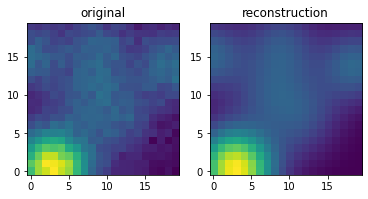

In [4]:
max_objects_smc = max_objects + 2
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3.)
smc = SMC(images[0], image_attributes, prior, num_blocks = max_objects_smc+1, catalogs_per_block = 500, max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()